## How to Interact with this Jupyter Notebook

In this activity, you will use a Jupyter Notebook, which integrates both text and code. The gray boxes contain executable code, which you will run in order to view its output. The text in between the code provides instructions.

# Project: Synthetic Data Generation

## Step 1: Importing libraries 
Run the cell below.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve

# Import SMOTE
from imblearn.over_sampling import SMOTE

## Step 2: Load the dataset into a pandas DataFrame

Follow the steps in the instructions document and run the cell below.

In [2]:
# insert code here 
diabetes_data = pd.read_csv('diabetes.csv')
# Use .read_csv() to load the 'diabetes.csv' file into a DataFrame named 'diabetes_data'.
# insert code here 

## Step 3: Check the data's dimensions

Follow the steps in the instructions document and run the cell below.

In [3]:
# Display the shape of the DataFrame (rows, columns)
print("\nShape of the DataFrame (rows, columns):", diabetes_data.shape)


Shape of the DataFrame (rows, columns): (768, 9)


## Step 4: Preview the data

Follow the steps in the instructions document and run the cell below.

In [4]:
# Use head() to preview the diabetes_data DataFrame 
# insert code here 
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Step 5: Get a summary of the data

Follow the steps in the instructions document and run the cell below.

In [5]:
# Use info() to see detailed information about the diabetes_data DataFrame.
# insert code here 
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Step 6: Check for missing data

Follow the steps in the instructions document and run the cell below.

In [6]:
# Check for missing values
# insert code here 
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

It looks like our dataset is complete and has zeros for all columns. The  dataset has the following features:

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skinfold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1), where 1 means the patient has diabetes

## Step 7: Analyzing the class distribution for imbalance

Follow the steps in the instructions document and run the cell below.

Class Distribution:
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Text(0, 0.5, 'Count')

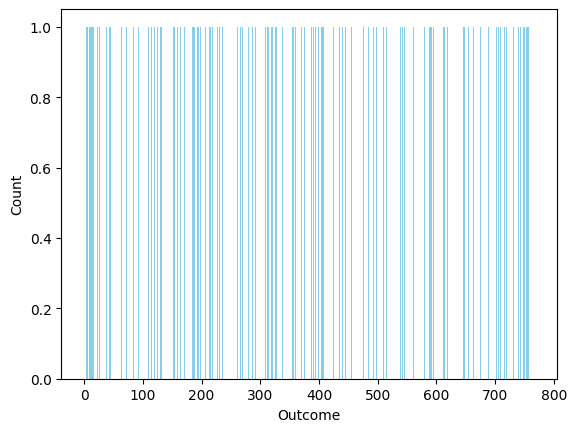

In [8]:
# Analyze the class distribution
class_counts = diabetes_data['Outcome'] # insert code here 
print("Class Distribution:")
print(class_counts)

# Visualize the class distribution
plt.bar(class_counts.index, class_counts.values, color='skyblue')
# insert code here 
plt.xlabel('Outcome')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis labe
# insert code here 

## Step 8: Separating features and target

Follow the steps in the instructions document and run the cell below.

In [10]:
# Features and target variable
x = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split into training and testing sets with stratification
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

## Step 9: Standardize features (feature scaling)

Follow the steps in the instructions document and run the cell below.

In [11]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Step 10: Apply SMOTE to the training data

Follow the steps in the instructions document and run the cell below.

In [15]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

## Step 11: Visualizing class distribution after SMOTE

Follow the steps in the instructions document and run the cell below.

Before SMOTE:
Outcome
0    400
1    214
Name: count, dtype: int64

After SMOTE:
Outcome
0    400
1    400
Name: count, dtype: int64


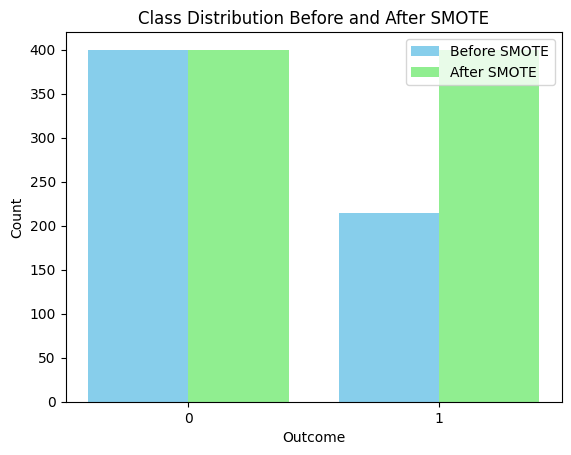

In [16]:
# Check the new class distribution
print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_smote.value_counts())

# Visualize the new class distribution
counts_before = y_train.value_counts()
counts_after = y_train_smote.value_counts()

plt.bar([0, 1], [counts_before.get(0, 0), counts_before.get(1, 0)], width=0.4, label='Before SMOTE', color='skyblue')
plt.bar([0.4, 1.4], [counts_after.get(0, 0), counts_after.get(1, 0)], width=0.4, label='After SMOTE', color='lightgreen')

plt.title('Class Distribution Before and After SMOTE')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['0', '1'])
plt.legend()
plt.show()

## Step 12: Initialize the logistic regression models

Follow the steps in the instructions document and run the cell below.

In [17]:
# Initialize the models
model_orig = LogisticRegression(solver='liblinear', max_iter=200)
model_smote = LogisticRegression(solver='liblinear', max_iter=200)

## Step 13: Train the models

Follow the steps in the instructions document and run the cell below.

In [18]:
# Train the model on original data
model_orig.fit(x_train_scaled, y_train)

# Train the model on SMOTE data
model_smote.fit(x_train_smote, y_train_smote)

LogisticRegression(max_iter=200, solver='liblinear')

## Step 14: Make predictions and prepare to evaluate models 

Follow the steps in the instructions document and run the cell below.

In [19]:
# Make predictions on the test set
y_pred_orig = model_orig.predict(x_test_scaled)
y_pred_smote = model_smote.predict(x_test_scaled)

# Predictions probability for ROC-AUC
y_prob_orig = model_orig.predict_proba(x_test_scaled)[:, 1]
y_prob_smote = model_smote.predict_proba(x_test_scaled)[:, 1]

# Evaluate the model's performance
def evaluate_model(y_test, y_pred, y_prob):
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("Precision:", round(precision_score(y_test, y_pred), 4))
    print("Recall:", round(recall_score(y_test, y_pred), 4))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 4))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

C:\Users\miguelestradam36\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\miguelestradam36\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Step 15: Evaluate the model on original data

Follow the steps in the instructions document and run the cell below.

In [20]:
print("Performance on Original Data:")
evaluate_model(y_test, y_pred_orig, y_prob_orig)

Performance on Original Data:
Accuracy: 0.7143
Precision: 0.6087
Recall: 0.5185
ROC-AUC: 0.8233

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



## Step 16: Evaluate the model on SMOTE-augmented data

Follow the steps in the instructions document and run the cell below.

In [21]:
print("Performance on SMOTE Augmented Data:")
evaluate_model(y_test, y_pred_smote, y_prob_smote)

Performance on SMOTE Augmented Data:
Accuracy: 0.6494
Precision: 0.0
Recall: 0.0
ROC-AUC: 0.6733

Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.00      0.00      0.00        54

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154



C:\Users\miguelestradam36\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miguelestradam36\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miguelestradam36\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\skle

## Step 17: Visualize and compare model performance

Follow the steps in the instructions document and run the cell below.

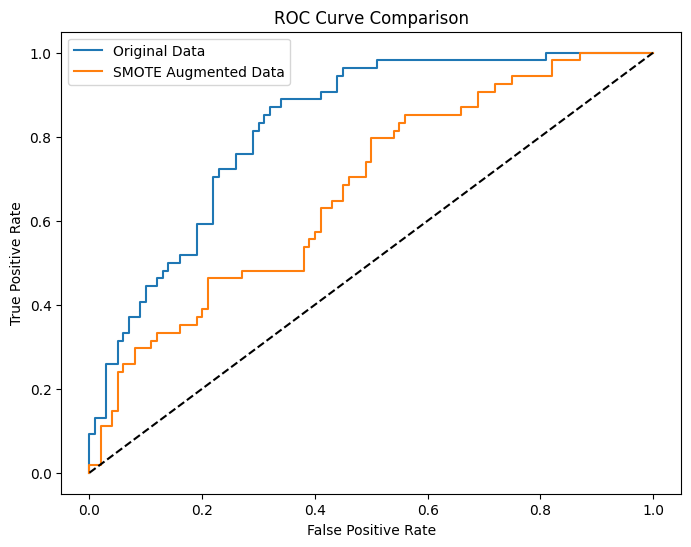

In [22]:
# Plot ROC curves
fpr_orig, tpr_orig, _ = roc_curve(y_test, y_prob_orig)
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_prob_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr_orig, tpr_orig, label='Original Data')
plt.plot(fpr_smote, tpr_smote, label='SMOTE Augmented Data')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

You have reached the end of this exercise.